<a href="https://colab.research.google.com/github/ZIZOUTOUMOU/LAB02-AdvDB/blob/main/tp2deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# ---------- Activation ----------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_deriv(a):
    return a * (1 - a)


# ---------- Dataset (XOR) ----------
X_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])

y_data = np.array([[0],[1],[1],[0]])


# ---------- Initialize Parameters ----------
np.random.seed(0)

W1 = np.random.randn(2, 2)
b1 = np.zeros((2, 1))

W2 = np.random.randn(1, 2)
b2 = np.zeros((1, 1))


# =========================================================
# 1) FORWARD
# =========================================================
def forward(X):

    Z1 = W1 @ X + b1
    A1 = sigmoid(Z1)

    Z2 = W2 @ A1 + b2
    A2 = sigmoid(Z2)

    cache = (X, Z1, A1, Z2, A2)
    return A2, cache


# =========================================================
# 2) LOSS (Binary Cross Entropy)
# =========================================================
def loss(y_hat, y):

    eps = 1e-8  # avoid log(0)

    L = -(y*np.log(y_hat + eps) +
          (1-y)*np.log(1 - y_hat + eps))

    return np.mean(L)


# =========================================================
# 3) BACKWARD
# =========================================================
def backward(cache, y):

    global W1, b1, W2, b2

    X, Z1, A1, Z2, A2 = cache

    # Output layer error
    delta2 = A2 - y

    dW2 = delta2 @ A1.T
    db2 = delta2

    # Hidden layer error
    delta1 = (W2.T @ delta2) * sigmoid_deriv(A1)

    dW1 = delta1 @ X.T
    db1 = delta1

    return dW1, db1, dW2, db2


# =========================================================
# 4) UPDATE
# =========================================================
def update(dW1, db1, dW2, db2, lr):

    global W1, b1, W2, b2

    W1 -= lr * dW1
    b1 -= lr * db1

    W2 -= lr * dW2
    b2 -= lr * db2


# =========================================================
# TRAINING LOOP
# =========================================================

lr = 0.5
epochs = 10000

for epoch in range(epochs):

    total_loss = 0

    for i in range(len(X_data)):

        X = X_data[i].reshape(2,1)
        y = y_data[i].reshape(1,1)

        # 1) Forward
        y_hat, cache = forward(X)

        # 2) Loss
        L = loss(y_hat, y)
        total_loss += L

        # 3) Backward
        dW1, db1, dW2, db2 = backward(cache, y)

        # 4) Update
        update(dW1, db1, dW2, db2, lr)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss:.4f}")


# =========================================================
# TEST
# =========================================================
print("\nPredictions:")

for x in X_data:
    X = x.reshape(2,1)
    y_hat, _ = forward(X)
    print(x, "→", y_hat[0,0])


Epoch 0, Loss: 3.6385
Epoch 1000, Loss: 0.0225
Epoch 2000, Loss: 0.0103
Epoch 3000, Loss: 0.0066
Epoch 4000, Loss: 0.0049
Epoch 5000, Loss: 0.0039
Epoch 6000, Loss: 0.0032
Epoch 7000, Loss: 0.0027
Epoch 8000, Loss: 0.0024
Epoch 9000, Loss: 0.0021

Predictions:
[0 0] → 0.000611779973868241
[0 1] → 0.9995772831717906
[1 0] → 0.9995769105075664
[1 1] → 0.0004310407978962753


Epoch 0, Loss: 3.6385
Epoch 1000, Loss: 0.0225
Epoch 2000, Loss: 0.0103
Epoch 3000, Loss: 0.0066
Epoch 4000, Loss: 0.0049
Epoch 5000, Loss: 0.0039
Epoch 6000, Loss: 0.0032
Epoch 7000, Loss: 0.0027
Epoch 8000, Loss: 0.0024
Epoch 9000, Loss: 0.0021

Predictions:
[0 0] → 0.000611779973868241
[0 1] → 0.9995772831717906
[1 0] → 0.9995769105075664
[1 1] → 0.0004310407978962753


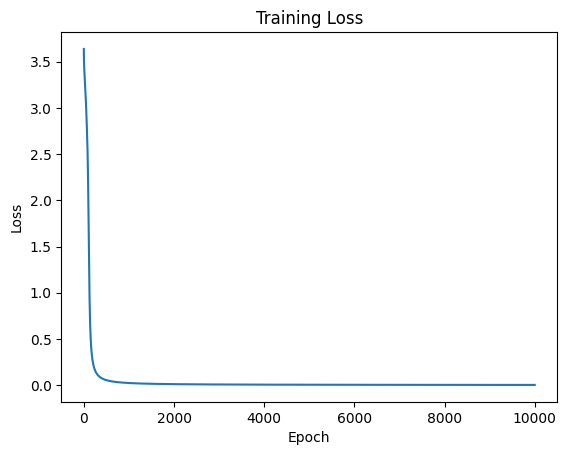

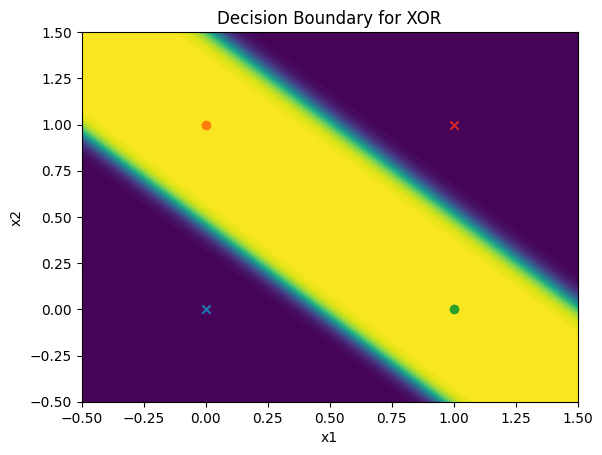

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Activation ----------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_deriv(a):
    return a * (1 - a)


# ---------- XOR Dataset ----------
X_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])

y_data = np.array([[0],[1],[1],[0]])


# ---------- Initialize Parameters ----------
np.random.seed(0)

W1 = np.random.randn(2, 2)
b1 = np.zeros((2, 1))

W2 = np.random.randn(1, 2)
b2 = np.zeros((1, 1))


# =========================================================
# FORWARD
# =========================================================
def forward(X):

    Z1 = W1 @ X + b1
    A1 = sigmoid(Z1)

    Z2 = W2 @ A1 + b2
    A2 = sigmoid(Z2)

    cache = (X, Z1, A1, Z2, A2)
    return A2, cache


# =========================================================
# LOSS
# =========================================================
def loss(y_hat, y):
    eps = 1e-8
    L = -(y*np.log(y_hat + eps) +
          (1-y)*np.log(1 - y_hat + eps))
    return np.mean(L)


# =========================================================
# BACKWARD
# =========================================================
def backward(cache, y):

    global W1, b1, W2, b2
    X, Z1, A1, Z2, A2 = cache

    delta2 = A2 - y
    dW2 = delta2 @ A1.T
    db2 = delta2

    delta1 = (W2.T @ delta2) * sigmoid_deriv(A1)
    dW1 = delta1 @ X.T
    db1 = delta1

    return dW1, db1, dW2, db2


# =========================================================
# UPDATE
# =========================================================
def update(dW1, db1, dW2, db2, lr):

    global W1, b1, W2, b2

    W1 -= lr * dW1
    b1 -= lr * db1

    W2 -= lr * dW2
    b2 -= lr * db2


# =========================================================
# TRAINING LOOP
# =========================================================

lr = 0.5
epochs = 10000
losses = []

for epoch in range(epochs):

    total_loss = 0

    for i in range(len(X_data)):

        X = X_data[i].reshape(2,1)
        y = y_data[i].reshape(1,1)

        y_hat, cache = forward(X)
        L = loss(y_hat, y)
        total_loss += L

        dW1, db1, dW2, db2 = backward(cache, y)
        update(dW1, db1, dW2, db2, lr)

    losses.append(total_loss)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss:.4f}")

# =========================================================
# TEST
# =========================================================
print("\nPredictions:")

for x in X_data:
    X = x.reshape(2,1)
    y_hat, _ = forward(X)
    print(x, "→", y_hat[0,0])
# =========================================================
# 📉 PLOT 1 — LOSS CURVE
# =========================================================

plt.figure()
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


# =========================================================
# 📊 PLOT 2 — DECISION BOUNDARY
# =========================================================

# Create grid
xx, yy = np.meshgrid(np.linspace(-0.5,1.5,200),
                     np.linspace(-0.5,1.5,200))

grid = np.c_[xx.ravel(), yy.ravel()]

preds = []

for point in grid:
    X = point.reshape(2,1)
    y_hat, _ = forward(X)
    preds.append(y_hat[0,0])

preds = np.array(preds).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, preds, levels=50)

# Plot XOR points
for i, x in enumerate(X_data):
    if y_data[i] == 1:
        plt.scatter(x[0], x[1], marker='o')
    else:
        plt.scatter(x[0], x[1], marker='x')

plt.title("Decision Boundary for XOR")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
